# Juan Ramón López Rocha

## 12 de septiembre

## Problemas de programación lineal

## 02

### 2.1. Ejemplo básico
Una multinacional farmacéutica desea fabricar un compuesto nutritivo a base de dos productos A y B.  El producto A contiene  $30\%$ de proteínas,  un $1\%$ de grasas y un  $10\%$ de azúcares.  El producto B  contiene  un  $5\%$  de proteínas,  un  $7\%$ de grasas  y un  $10\%$  de  azúcares.

El compuesto debe de tener,  al menos, $25g$ de proteínas,  $6g$ de grasas y $30g$ de azúcares.  El coste del producto A es de $0.6$ u.m./g  y el de B es de $0.2$  u.m./g

Se desea encontrar la cantidad en gramos de cada producto para que el coste total sea mínimo.

Formular el problema de decidir cuánto hacer de cada producto como un problema de programación lineal.

1. Identificar el criterio de optimización
* Minimizar los costos
2. Variables de control
* x_a = Producto A
* x_b = producto B

3. Función de costo
$$ C = 0.6x_a + 0.2x_b $$

4. Información adicional
* Restricciones:
$$Proteína = 0.3x_a + 0.05x_b \geq 25 $$
$$Grasa = 0.01x_a + 0.07x_b \geq 6 $$
$$Azúcar = 0.1x_a + 0.1x_b \geq 30 $$

In [23]:
import numpy as np

c = np.array([0.6,0.2])

Aub = np.array([
    [-0.30,-0.05],
    [-0.01,-0.07],
    [-0.10,-0.10]
])

bub = np.array([-25,-6,-30])

import scipy.optimize as opt 

sol = opt.linprog(c, Aub, bub)
sol.x

Aub @ sol.x

array([-25. , -18.6, -30. ])

### 2.2. Ejemplo básico 2
Una  fábrica  de  carrocerías  de  automóviles  y camiones  tiene  dos naves. 

+ En  la nave A,  para  hacer  la  carrocería  de  un  camión,  se  invierten  siete  días-operario,  para  fabricar  la  de  un  coche  se  precisan dos días-operario.

+ En la nave B se invierten tres días operario tanto en carrocerías de camión como de coche. 

Por limitaciones de mano de obra y maquinaria, la nave A dispone de $300$ días operario, y la nave B de $270$ días-operario.

Si los beneficios que se obtienen por cada camión son de $600$ u.m y por  cada  automóvil  $200$ u.m,  ¿cuántas  unidades  de  cada  uno  se deben  producir  para maximizar las  ganancias? 

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

1. Identificar el problema de optimización
* Maximizar ganancia

2. Variables de control
* aa = Autos en nave A
* ca = Camiones en nave A
* ab = Autos en nave B
* cb = Camiones en nave B

3. Función de costo
$$ C = 200aa + 600ca + 200ab + 600cb $$

4. Información adicional (restricciones)
$$ Nave A: 2a_a + 7c_a \leq 300 $$
$$ Nave B: 3a_b + 3c_b \leq 270 $$

In [32]:
import numpy as np

c = np.array([-200,
              -600,
              -200,
              -600
             ])

Aub = np.array([
    [2,7,0,0],
    [0,0,3,3]
])

bub = np.array([300,
               270])

import scipy.optimize as opt 

sol = opt.linprog(c, Aub, bub)
print (sol.x)
print ("Se deben producir 150 autos en A y 90 camiones en B")

[150.   0.   0.  90.]
Se deben producir 150 autos en A y 90 camiones en B


## A05

Ejercicio 1

Se quiere producir comida para gatos de la manera más barata, no obstante se debe también asegurar que se cumplan los datos requeridos de analisis nutricional. Por lo que se quiere variar la cantidad de cada ingrediente para cumplir con los estandares nutricionales. Los requisitos que se tienen es que en 100 gramos, se deben tener por lo menos 9 gramos de proteína y  7 gramos de grasa. Así mismo, no se debe tener más de 2.5 gramos de fibra y 0.5 gramos de sal.

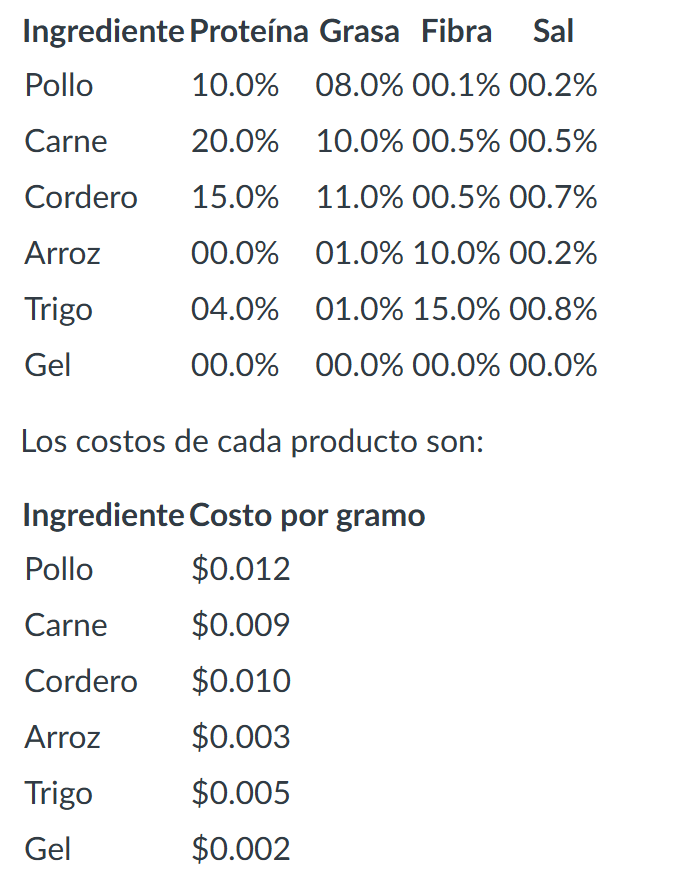

1. Identificar el criterio de optimización
* Minimizar los costos
2. Variables de control
* x_1 = Pollo
* x_2 = Carne
* x_3 = Cordero
* x_4 = Arroz
* x_5 = Trigo
* x_6 = Gel

3. Función de costo
$$ C = 0.012x_1 + 0.009x_2 + 0.010x_3 + 0.003x_4 + 0.005x_5 + 0.002x_6 $$
4. Información adicional (restricciones)

Producto final debe contener
* Al menos 9g de proteína
* Al menos 7g de grasa
* No más de 2.5g de fibra
* No más de 0.5g de sal

$$ 0.10x_1 + 0.20x_2 + 0.15x_3 + 0.04x_5 \geq9 $$
$$ 0.08x_1 + 0.10x_2 + 0.11x_3 + 0.01x_4 + 0.01x_5 \geq7 $$
$$ 0.001x_1 + 0.005x_2 + 0.005x_3 + 0.1x_4 + 0.15x_5 \leq2.5 $$ 
$$ 0.002x_1 + 0.005x_2 + 0.007x_3 + 0.002x_4 + 0.009x_5 \leq0.5 $$
$$ x_1 + x_2 + x_3 + x_4 + x_5 + x_6 \geq100 $$

In [61]:
import numpy as np

c = np.array([0.012,
              0.009,
              0.010,
              0.003,
              0.005,
              0.002
              ])
#renglones o restricciones * columnas o variables
Aub = np.array([
    [-0.1,-0.2,-0.15,-0,-0.04,-0],
    [-0.08,-0.10,-0.11,-0.01,-0.01,-0],
    [0.001,0.005,0.005,0.1,0.15,0],
    [0.002,0.005,0.007,0.002,0.009,0],
    [-1,-1,-1,-1,-1,-1]
                ])
#todos deben de ser menor o igual por eso se cambia el signo 
bub = np.array([-9,
               -7,
               2.5,
               0.5,
               -100
               ])

import scipy.optimize as opt 

sol = opt.linprog(c, Aub, bub)
print (sol.x)
print ("Por cada 100 gramos se necesitan 70 gramos de carne y 30 gramos de gel")

[ 0. 70.  0.  0.  0. 30.]
Por cada 100 gramos se necesitan 70 gramos de carne y 30 gramos de gel


Ejercicio 2

La Comisión Federal de Electricidad (CFE) dispone de cuatro plantas de generación para satisfacer la demanda diaria eléctrica en cuatro ciudades, Guadalajara, León y Morelia. Las plantas 1, 2 y 3 pueden satisfacer 75, 50 y 60 millones de kW al día respectivamente. Las necesidades de las ciudades de Guadalajara, León y Morelia son de 60, 45 y 60 millones de Kw al día respectivamente.

Los costos asociados al envío de suministro energético por cada millón de kW entre cada planta y cada ciudad son los registrados en la siguiente tabla.

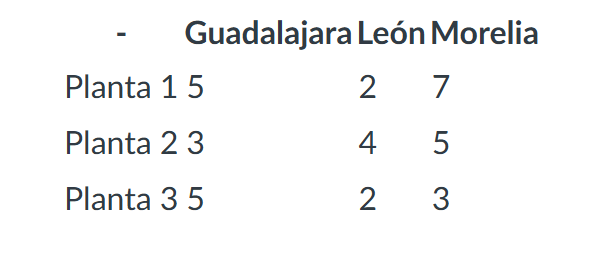

1. Identificar el criterio de optimización
* Minimizar los costos de logística
2. Variables de control
* x_1 = Planta 1 Guadalajara
* x_2 = Planta 1 León
* x_3 = Planta 1 Morelia
* x_4 = Planta 2 Guadalajara
* x_5 = Planta 2 León
* x_6 = Planta 2 Morelia
* x_7 = Planta 3 Guadalajara
* x_8 = Planta 3 León
* x_9 = Planta 3 Morelia
3. Función de costo
$$ C = 5x_1 + 2x_2 + 7x_3 + 3x_4 + 4x_5 + 5x_6 + 5x_7 + 2x_8 + 3x_9 $$
4. Restricciones
$$ x_1 + x_2 + x_3 \leq 75$$
$$ x_4 + x_5 + x_6 \leq 50$$
$$ x_7 + x_8 + x_9 \leq 60$$
$$ x_1 + x_4 + x_7 \geq 60$$
$$ x_2 + x_5 + x_8 \geq 45$$
$$ x_3 + x_6 + x_9 \leq 60$$

In [68]:
import numpy as np

c = np.array([5,
              2,
              7,
              3,
              4,
              5,
              5,
              2,
              3])
#renglones o restricciones * columnas o variables
Aub = np.array([
    [1,1,1,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,1,1,1],
    [-1,0,0,-1,0,0,-1,0,0],
    [0,-1,0,0,-1,0,0,-1,0],
    [0,0,-1,0,0,-1,0,0,-1]
])
#todos deben de ser menor o igual por eso se cambia el signo 
bub = np.array([75,
               50,
               60,
               -60,
               -45,
               -60])

import scipy.optimize as opt 

sol = opt.linprog(c, Aub, bub)
print (sol.x)
print ("Minimizando los costos de districbución se necesitan 10 millones de kw para planta 1 en Gdl, 45 planta 1 en León, 50 planta 2 Gdl y 60 planta 3 Morelia")

[10. 45.  0. 50.  0.  0.  0.  0. 60.]
Minimizando los costos de districbución se necesitan 10 millones de kw para planta 1 en Gdl, 45 planta 1 en León, 50 planta 2 Gdl y 60 planta 3 Morelia


## A06

Una carpintería local fabrica sillas, mesas, libreros y bases de cama. Hay dos empleados en esta carpintería: un empleado experimentado y un aprendiz. El aprendiz tarda aproximadamente 50% más tiempo que el carpintero experimentado en construir cualquier cosa, además de que tiene un desperdicio de alrededor de 20% de material. Los materiales y tiempos necesarios para construir algo se desglozan en la siguiente tabla:

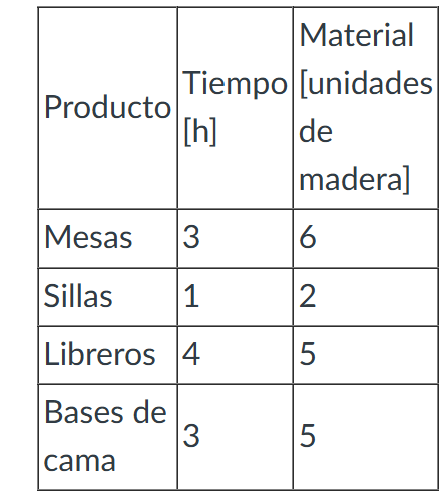

Las mesas se venden en 9000, las sillas en 3000, los libreros en 10000, y las bases de cama en 9000. Suponiendo una jornada de 40 horas a la semana y que tienen 100 unidades de madera, ¿qué les conviene construir durante una semana para maximizar su ganancia?

* ¿Cuántas horas trabaja cada quién?
* ¿Cuánto material se usa?
* ¿Cuál se el ingreso total si se vende todo lo fabricado?

1. Identificar el criterio de optimización
* Maximiizar la ganancia

2. Variables de control
* M_a = Mesas de aprendiz
* M_c = Mesas de carpintero
* S_a = Sillas de aprendiz
* S_c = Sillas de carpintero
* L_a = Librero de aprendiz
* L_c = Librero de carpintero
* B_a = Base de cama de aprendiz
* B_c = Base de carptintero

3. Función de costo
   
$$ C = 9000M_a + 9000M_c + 3000S_a + 3000S_c + 10000L_a + 10000L_c + 9000B_a + 9000B_c $$

4. Restricciones

$$ 3M_c + S_c + 4L_c + 3B_c\leq40 $$
$$ 4.5M_a + 1.5S_a + 6L_a + 4.5B_a\leq40 $$
$$ 7.2M_a + 6M_c + 2.4S_a + 2S_c + 6L_a + 5L_c + 6B_a + 5B_c \leq100 $$


In [71]:
import numpy as np

c = np.array([-9000,
              -9000,
              -3000,
              -3000,
              -10000,
              -10000,
              -9000,
              -9000])
#renglones o restricciones * columnas o variables
Aub = np.array([
    [0,3,0,1,0,4,0,3],
    [4.5,0,1.5,0,6,0,4.5,0],
    [7.2,6,2.4,2,6,5,6,5]
])
#todos deben de ser menor o igual por eso se cambia el signo 
bub = np.array([40,
               40,
               100,
               ])

import scipy.optimize as opt 

sol = opt.linprog(c, Aub, bub, integrality = 1)
print (Aub @ sol.x)
print (-sol.fun)
print ("Las horas trabajadas por el aprendiz son 39 y el carpintero 40")
print ("El material utilizado es 100")
print ("La ganancia es de $176,000")

[40.  39.  99.8]
176000.0
Las horas trabajadas por el aprendiz son 39 y el carpintero 40
El material utilizado es 100
La ganancia es de $176,000


2. La carpintería recibió una orden por 3 combos de mesa + 6 sillas.

* ¿Se puede cumplir la orden?
* Si sí, ¿qué es lo que tienen que fabricar en el resto del tiempo y con el resto del material para maximizar su ganancia?
* ¿Cuántas horas trabaja cada quién?
* ¿Cuánto material se usa?
* ¿Cuál es el nuevo ingreso total?

$$ 3M_c + S_c + 4L_c + 3B_c\leq40 $$
$$ 4.5M_a + 1.5S_a + 6L_a + 4.5B_a\leq40 $$
$$ 7.2M_a + 6M_c + 2.4S_a + 2S_c + 6L_a + 5L_c + 6B_a + 5B_c \leq100 $$
$$ M_a + M_c \geq3$$
$$ S_a + S_c \geq18$$

In [74]:
import numpy as np

c = np.array([-9000,
              -9000,
              -3000,
              -3000,
              -10000,
              -10000,
              -9000,
              -9000])
#renglones o restricciones * columnas o variables
Aub = np.array([
    [0,3,0,1,0,4,0,3],
    [4.5,0,1.5,0,6,0,4.5,0],
    [7.2,6,2.4,2,6,5,6,5],
    [-1,-1,0,0,0,0,0,0],
    [0,0,-1,-1,0,0,0,0]
])
#todos deben de ser menor o igual por eso se cambia el signo 
bub = np.array([40,
               40,
               100,
                -3,
                -18
               ])

import scipy.optimize as opt 

sol = opt.linprog(c, Aub, bub, integrality = 1)
print (sol.x)
print (Aub @ sol.x)
print (-sol.fun)
print ("Si se puede cumplir")
print ("Se deben hacer 3 mesas por el carpintero, 18 sillas por el carpintero, 5 libreros por el aprendiz y 3 libreros por el carpintero")
print ("Las horas trabajadas por el aprendiz son 30 y el carpintero 39")
print ("El material utilizado es 99")
print ("La ganancia es de $161,000")

[ 0.  3.  0. 18.  5.  3.  0.  0.]
[ 39.  30.  99.  -3. -18.]
161000.0
Si se puede cumplir
Se deben hacer 3 mesas por el carpintero, 18 sillas por el carpintero, 5 libreros por el aprendiz y 3 libreros por el carpintero
Las horas trabajadas por el aprendiz son 30 y el carpintero 39
El material utilizado es 99
La ganancia es de $161,000
